# Task 1 - Bayes læresætning: 

## A:  
60 % spiller fodbold (A),  
36 % spiller hockey (B),  
40 % af fodboldspillerne spiller også hockey (B|A).  
Hvor stor en procentdel af hockeyspillerne spiller også fodbold (A|B)? 

In [69]:
a, b, b_a = 0.6, 0.36, 0.4
a_b = ((b_a * a) / b) * 100
print("Procent hockeyspillere, der også spiller fodbold: " + str(a_b))

Procent hockeyspillere, der også spiller fodbold: 66.66666666666666


## B:  
40 % kan lide musik (A),  
24 % kan lide at danse (B),  
30 % af dem der kan lide musik, kan også lide at danse (B|A),  
hvor stor en procentdel af dem der kan lide at danse, kan også lide musik (A|B)?

In [70]:
a, b, b_a = 0.4, 0.24, 0.3
a_b = ((b_a * a) / b) * 100
print("Procent danseglade, der også kan lide musik: " + str(a_b))

Procent danseglade, der også kan lide musik: 50.0


## C:
60 % produceres af maskine X (A),  
40 % produceres af maskine Y (B),  
2 % af X's enheder fungerer ikke (C|A),  
1.5% af Y's  enheder fungerer ikke (C|B),  
hvad er sandsynligheden for at en given ikke-fungerende enhed stammer fra maskine X (A|C)?

In [71]:
a, b, c_a, c_b = 0.6, 0.4, 0.02, 0.015
a_c = (c_a * a) / ((c_a * a)+(c_b * b))
a_c

0.6666666666666666

# Task 2 - KNN Classifier.

In [72]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc

In [73]:
iris = datasets.load_iris()
knn = KNeighborsClassifier(n_neighbors=3)
X = iris.data
y = iris.target
#knn.fit(X, y) Fit kun på train set, for at kunne teste med det resterende sæt

In [74]:
#X_train, X_test, y_train, y_test = train_test_split(...)
trainData, testData, trainTargets, testTargets = train_test_split(iris.data, iris.target, train_size = 0.8, random_state = 1)

In [75]:
knn.fit(trainData, trainTargets) # her estimeres den funktion der bedst repræsenterer datapunkterne og deres target.
predicted = knn.predict(testData) # Kør modellen med test data.
print("Accuracy", accuracy_score(predicted, testTargets) * 100, '%') # Scor nøjagtigheden.

Accuracy 100.0 %


# Task 4 - Wine KNN Classifier

In [76]:
import seaborn as sns

In [86]:
## Load dataset.
wine = datasets.load_wine()
print("Features: ", wine.feature_names)
print(wine.feature_names[0])


Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
alcohol


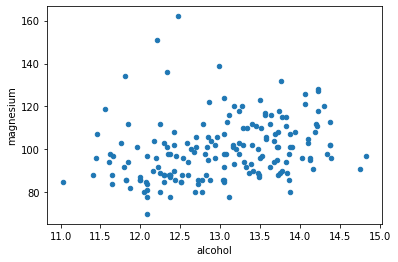

In [93]:
## Lets see the data.
import pandas
wine_df = pandas.DataFrame(wine.data, columns=wine.feature_names)
wine_df.plot.scatter(0,4) # alcohol/magnesium

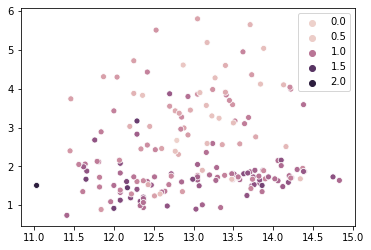

In [78]:
# Tag alkohol, æblesyre, nuance ud af data.
alcohol = [w[0] for w in wine.data]
malic_acid = [w[1] for w in wine.data] # æblesyre
hue = [w[10] for w in wine.data] # vin nuance
magnesium = [w[4] for w in wine.data]
# Vis i scatter plot.
sns.scatterplot(alcohol, malic_acid, hue) # Viser sammenhængen mellem alkoholprocent, æblesyre og vinens farve.

In [79]:
# Sæt n, split data og træn model.
knn = KNeighborsClassifier(n_neighbors=1)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, train_size=0.8, random_state=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [80]:
# Test modellen.
predicted = knn.predict(X_test)
accuracy_score(y_test, predicted)

# Nøjagtigheden er relativ lav, fordi der er mange parametre at sammenligne på 
# og fordi værdier ligger tæt. Det er svært at finde den nøjagtige algoritme.

0.75

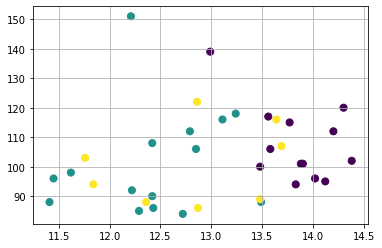

In [138]:
# Lad os se klassificeringen.
predicted = knn.predict(X_test)
alcohol, magnesium = wine.feature_names.index('alcohol'), wine.feature_names.index('magnesium')


plt.title="Alcohol/magnesium"
plt.xlabel = 'alcohol'
plt.ylabel = 'magnesium'
plt.scatter(X_test[:,alcohol], X_test[:,magnesium], c=predicted, s=50, cmap='viridis')


plt.grid(True)
plt.show()

# Her kan vi også se, at der ikke er nogen entydig adskillelse mellem klassificeringerne når vi bruger værdierne for alkohol og magnesium.


# Task 5 - Gaussian Naïve Bayes classification.

1.0


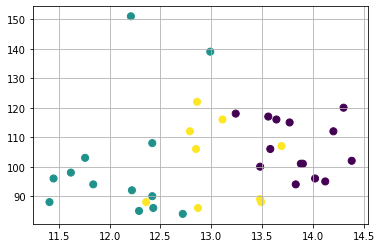

In [142]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

predicted = classifier.predict(X_test)
print(accuracy_score(y_test, predicted))

plt.title="Alcohol/magnesium"
plt.xlabel = 'alcohol'
plt.ylabel = 'magnesium'
plt.scatter(X_test[:,alcohol], X_test[:,magnesium], c=predicted, s=50, cmap='viridis')


plt.grid(True)
plt.show()

# Task 6 - KNN eller Gaussian Naïve Bayes classification.

Vi kan se af graferne, er der er en større distinktion mellem elementerne, vinene, i grafen, når de klassificeres vha. Gaussian Naïve Bayes. Accuracy scoren er også 1.0 på test-datasættet. 
Grunden kan formentlig findes i, at de forskellige attributter for vinene, har en uafhængig vægtning, når der bruges GaussianNB, dvs. de har en vægtning baseret på hele populationen; alle vinene.    
I KNN ses (formentlig) alene på de nærmeste naboers typer og den hyppigst forekommende vælges. Den skønnes at være billigere, hurtigere men præcisionen lider.
